In [1]:
from periomod.data import StaticProcessEngine
from periomod.descriptives import DescriptivesPlotter

In [2]:
engine = StaticProcessEngine(behavior=False, scale=False)
df = engine.load_data()
df = engine.process_data(df)
plotter = DescriptivesPlotter(df)

Initial number of patients: 746
Initial number of rows: 100950
Number of unique patients removed: 7
Number of rows removed: 1026
Remaining number of patients: 739
Remaining number of rows: 99924


/Users/toby/periodontal-modeling/periomod/data/_preprocessing.py:234: UserWarning: Missing values found: 
percussion-sensitivity      222
sensitivity                 312
furcationbaseline         88304
recbaseline                9878
plaque                     2513
bop                         633
bodymassindex              1560
periofamilyhistory        10056
diabetes                    666
smokingtype               38220
cigarettenumber           85164
stresslvl                  2502
boprevaluation              567
dtype: int64
  df = self._impute_missing_values(df)


No missing values after imputation.


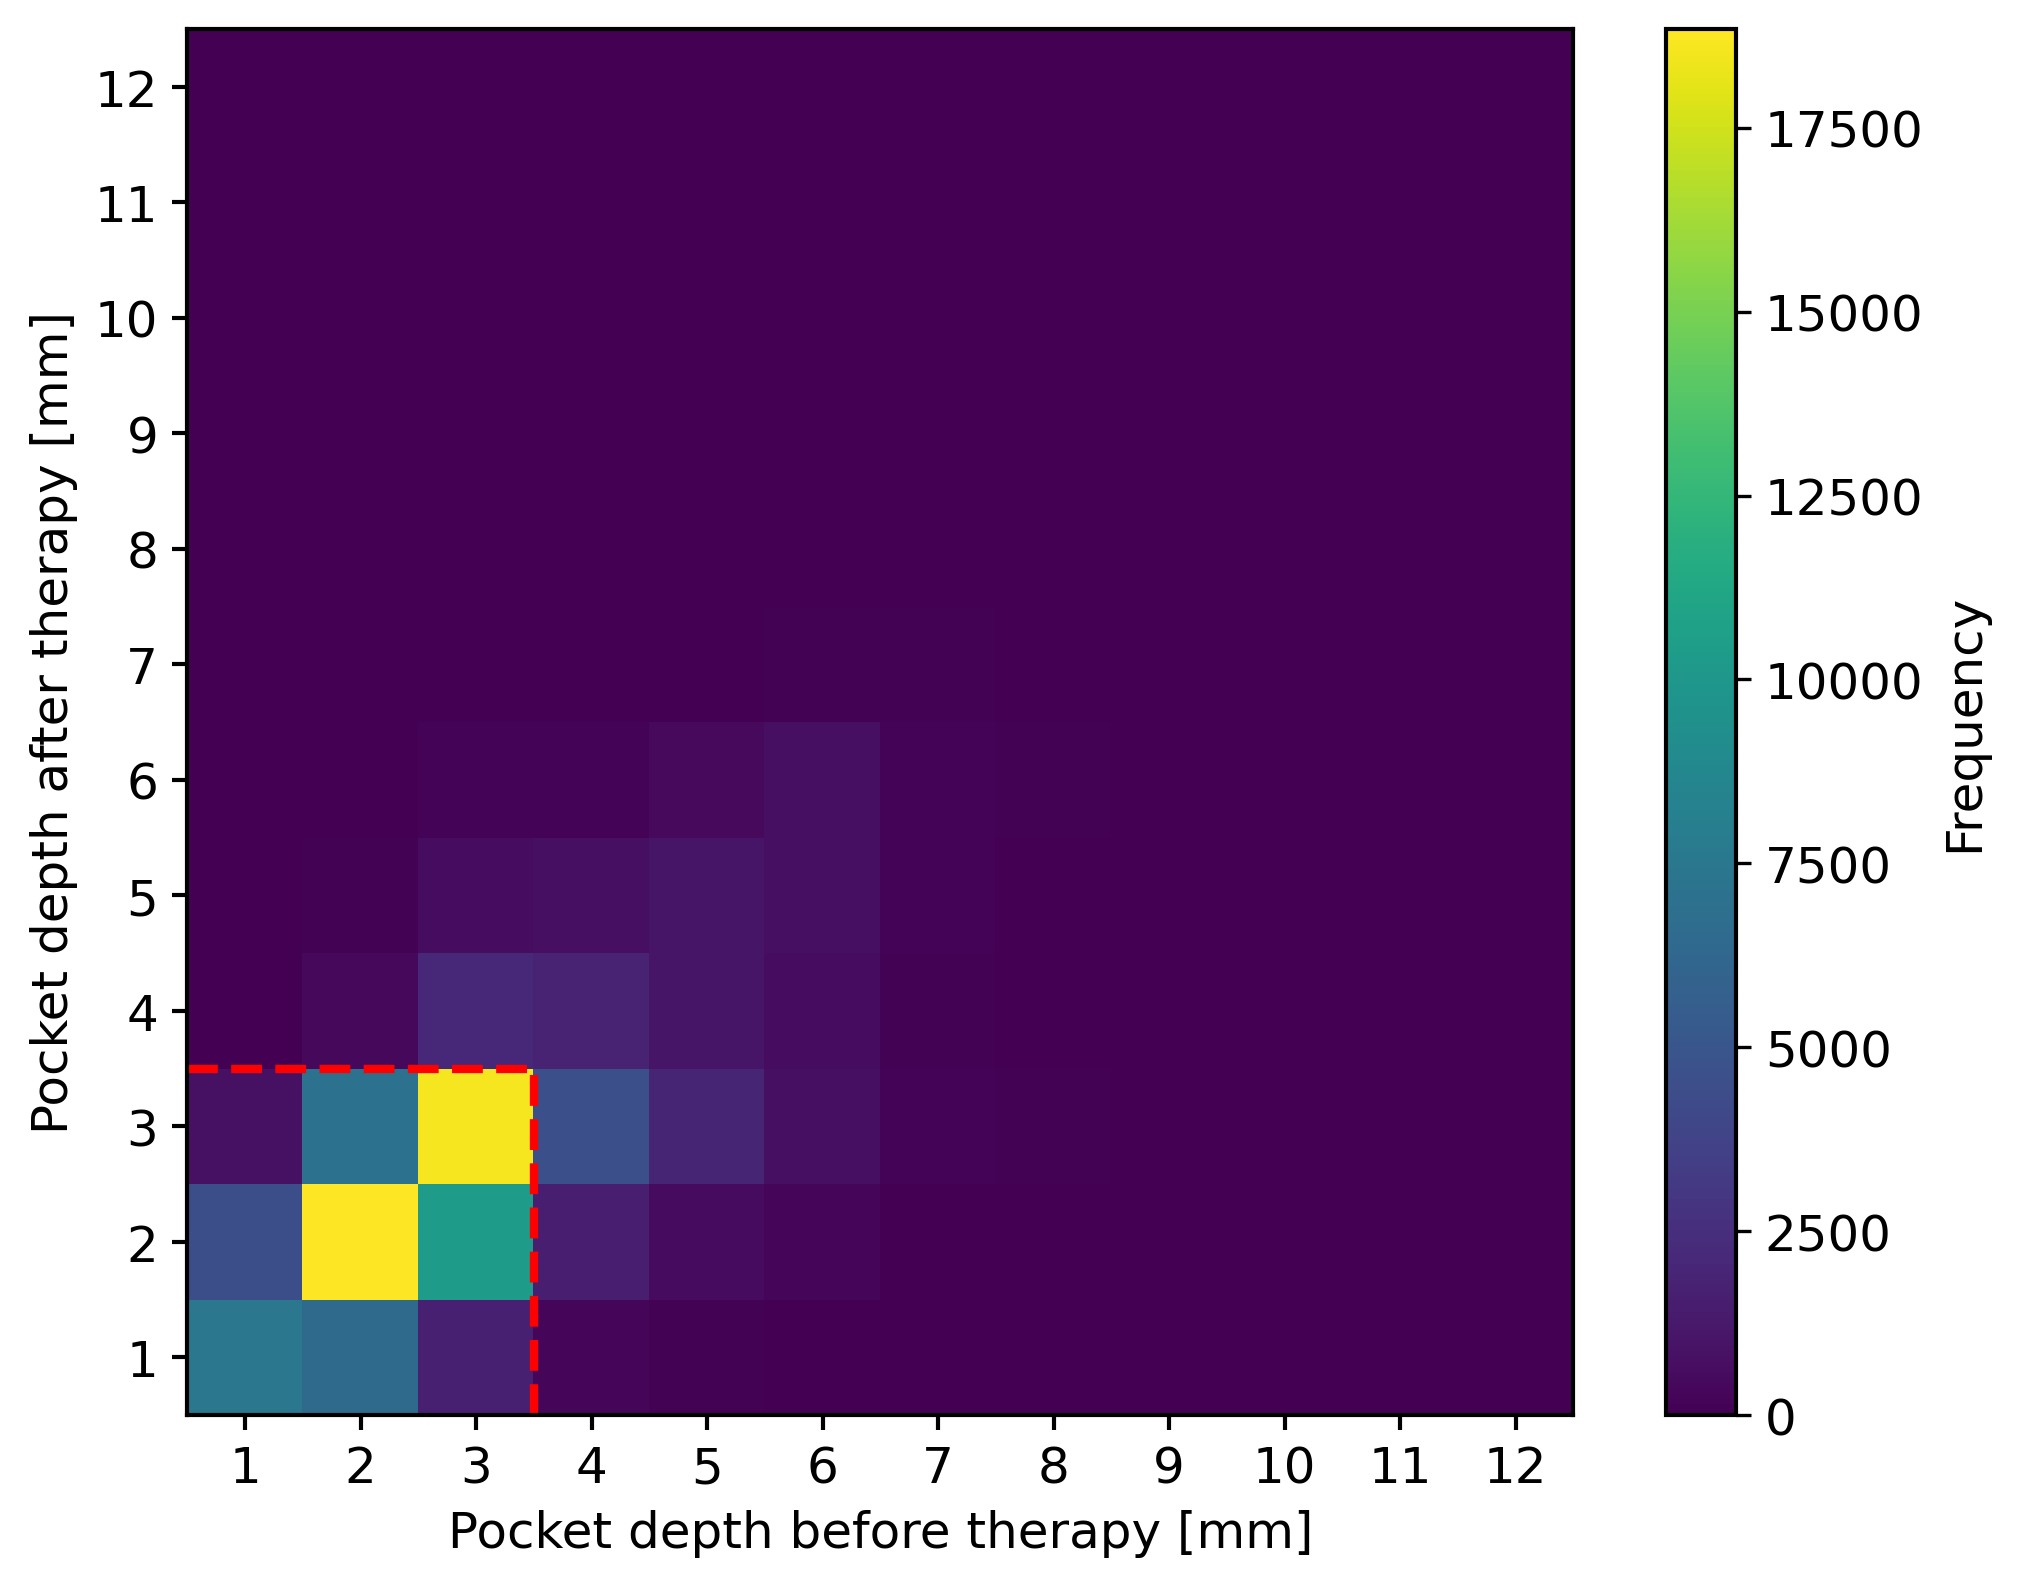

In [3]:
plotter.histogram_2d("pdbaseline", "pdrevaluation")

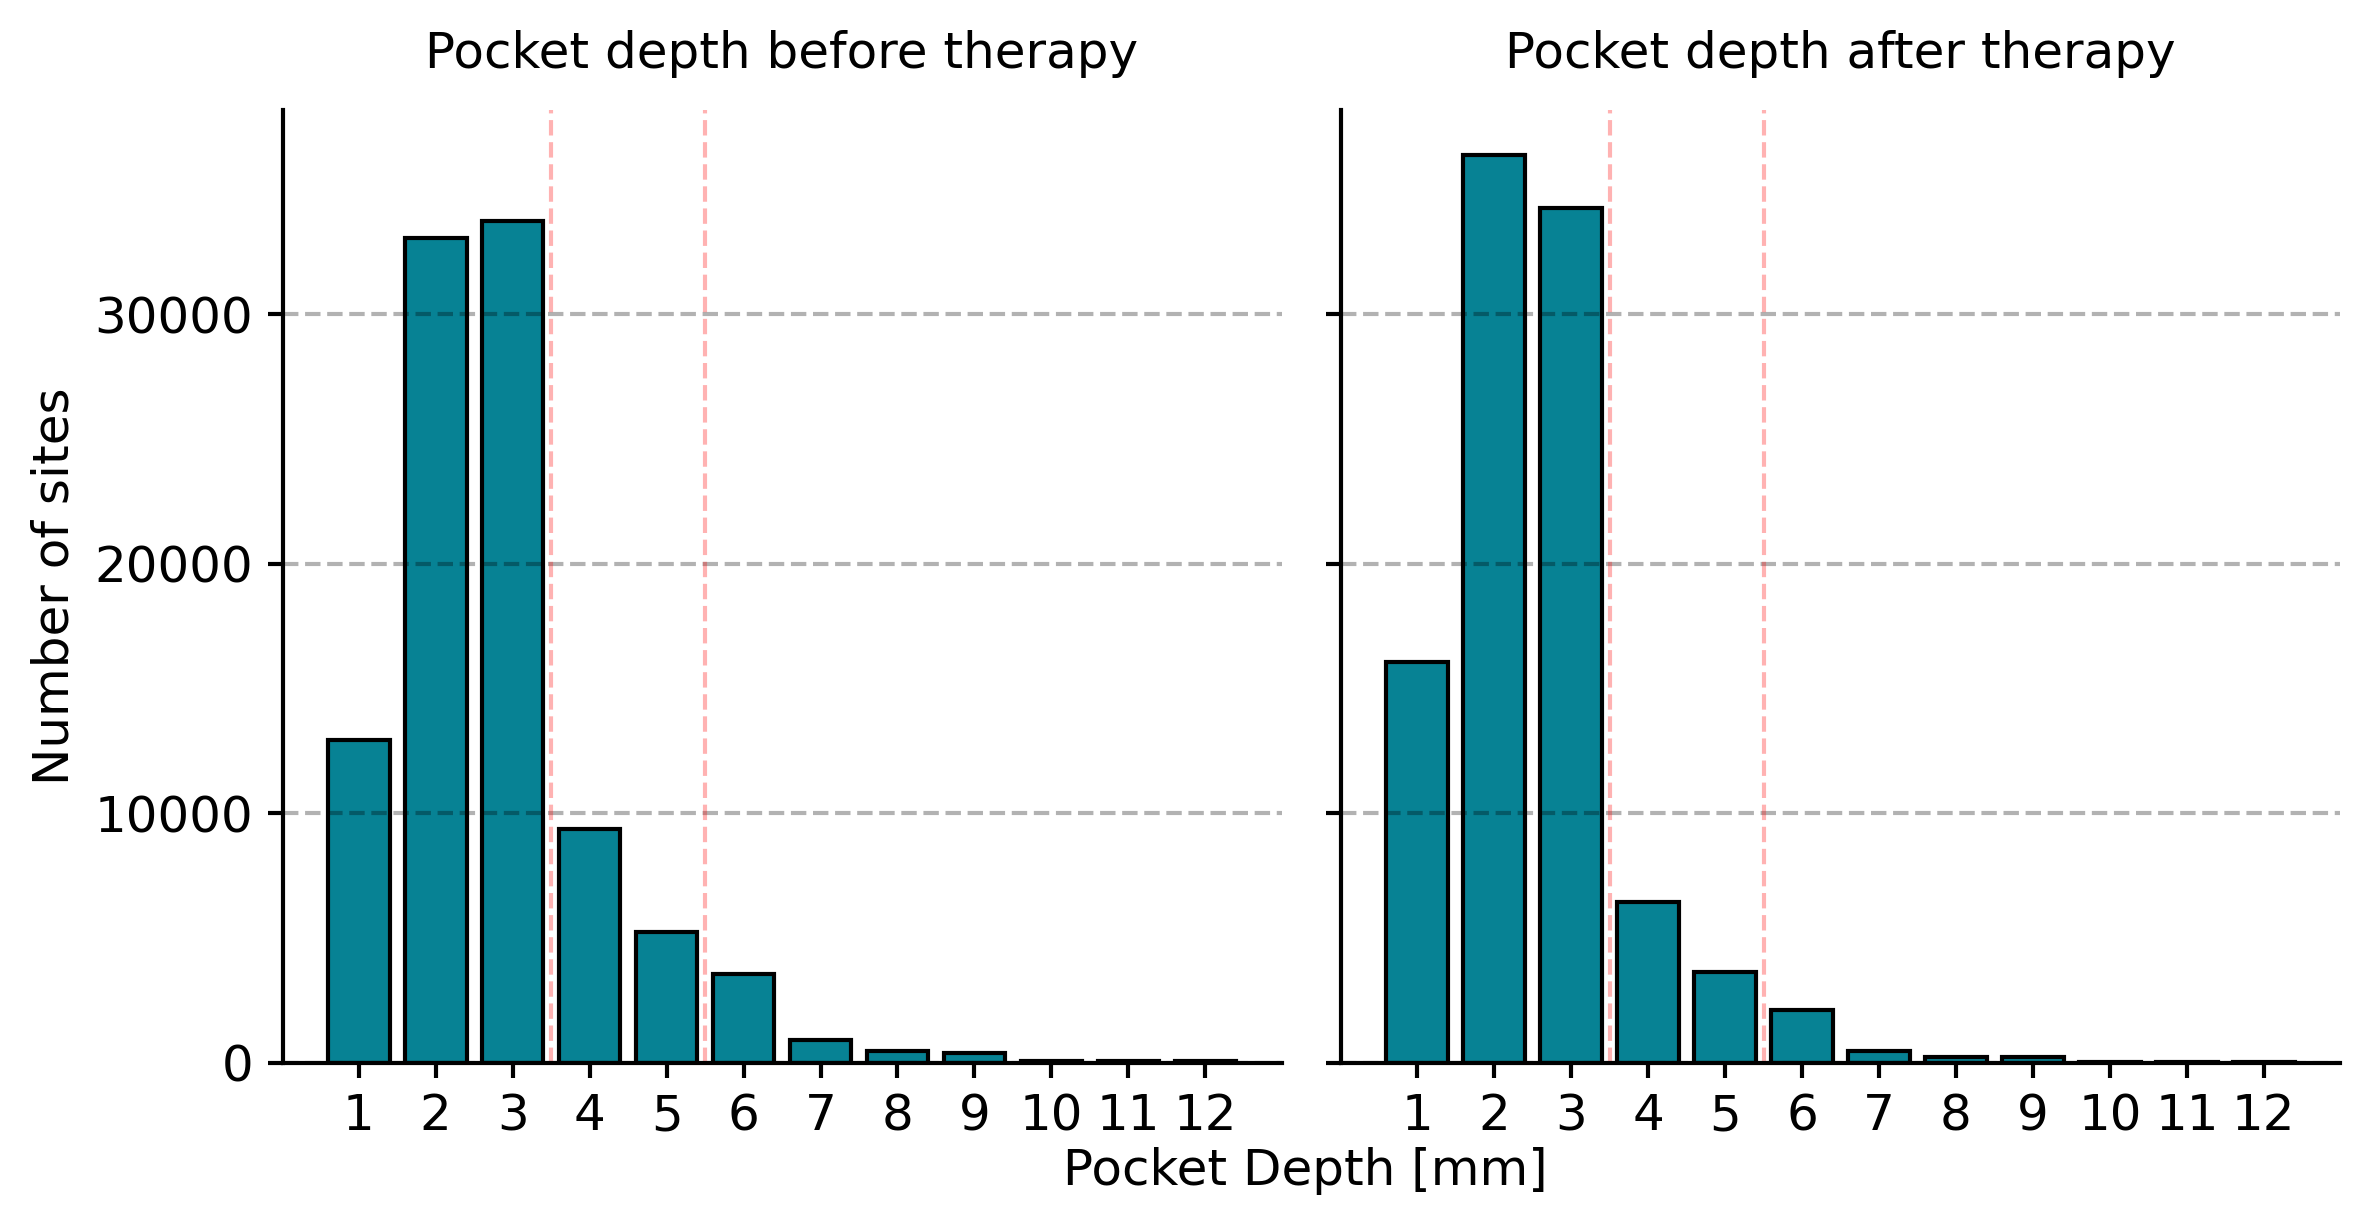

In [4]:
plotter.pocket_comparison("pdbaseline", "pdrevaluation")

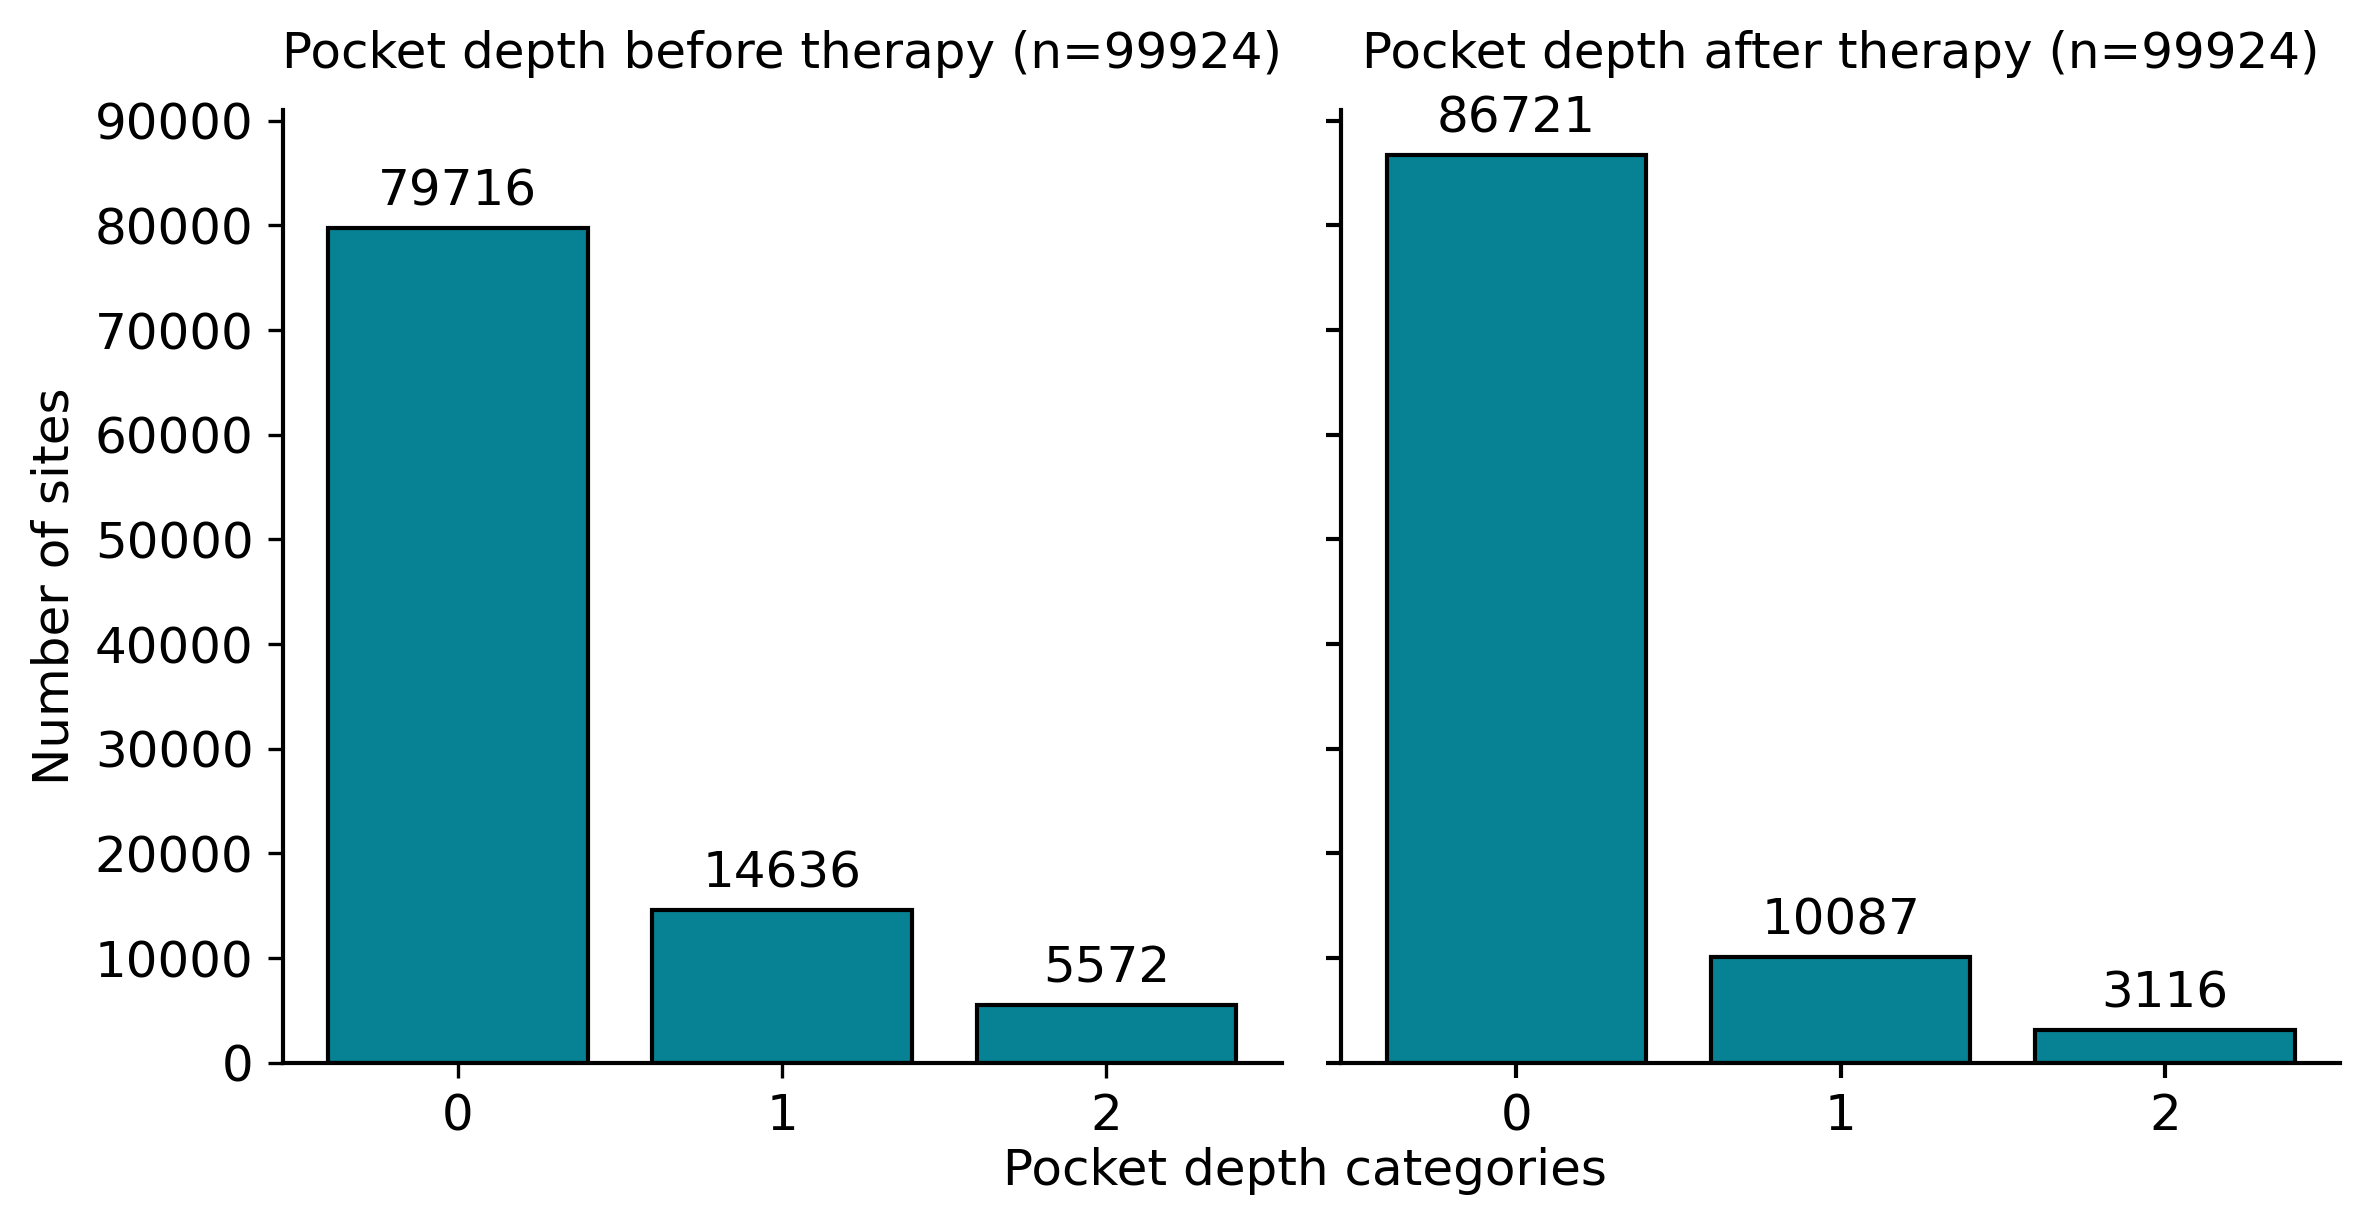

In [10]:
plotter.pocket_group_comparison("pdgroupbase", "pdgrouprevaluation")

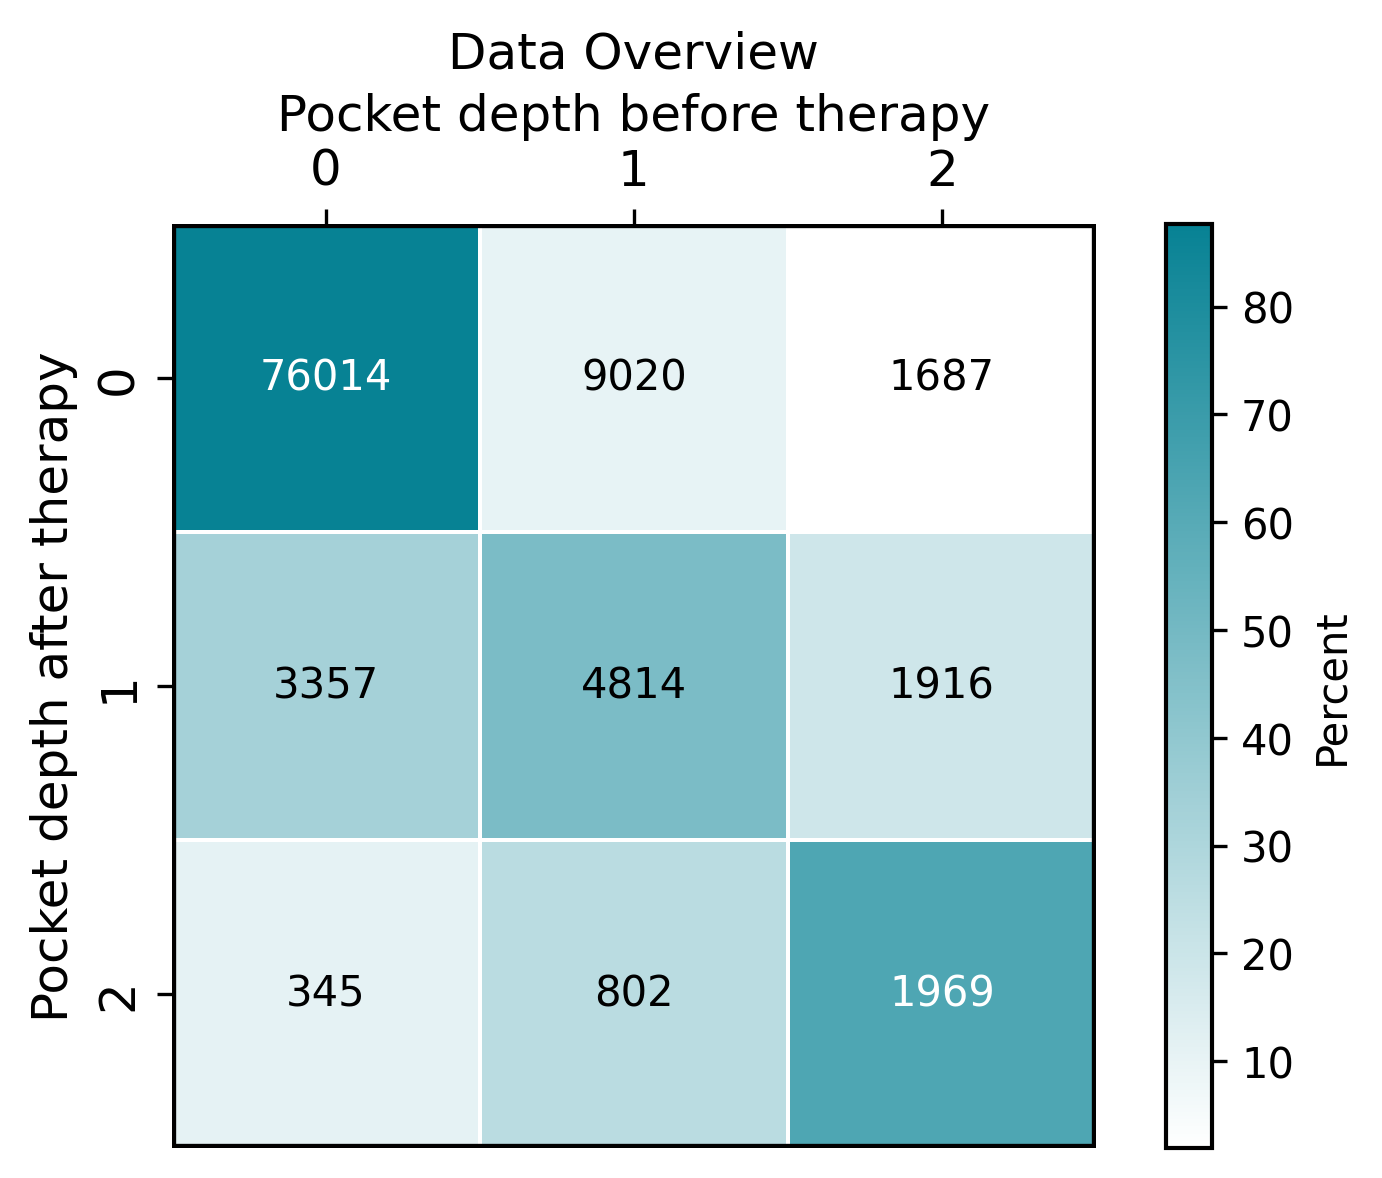

In [12]:
plotter.plt_matrix("pdgrouprevaluation", "pdgroupbase")

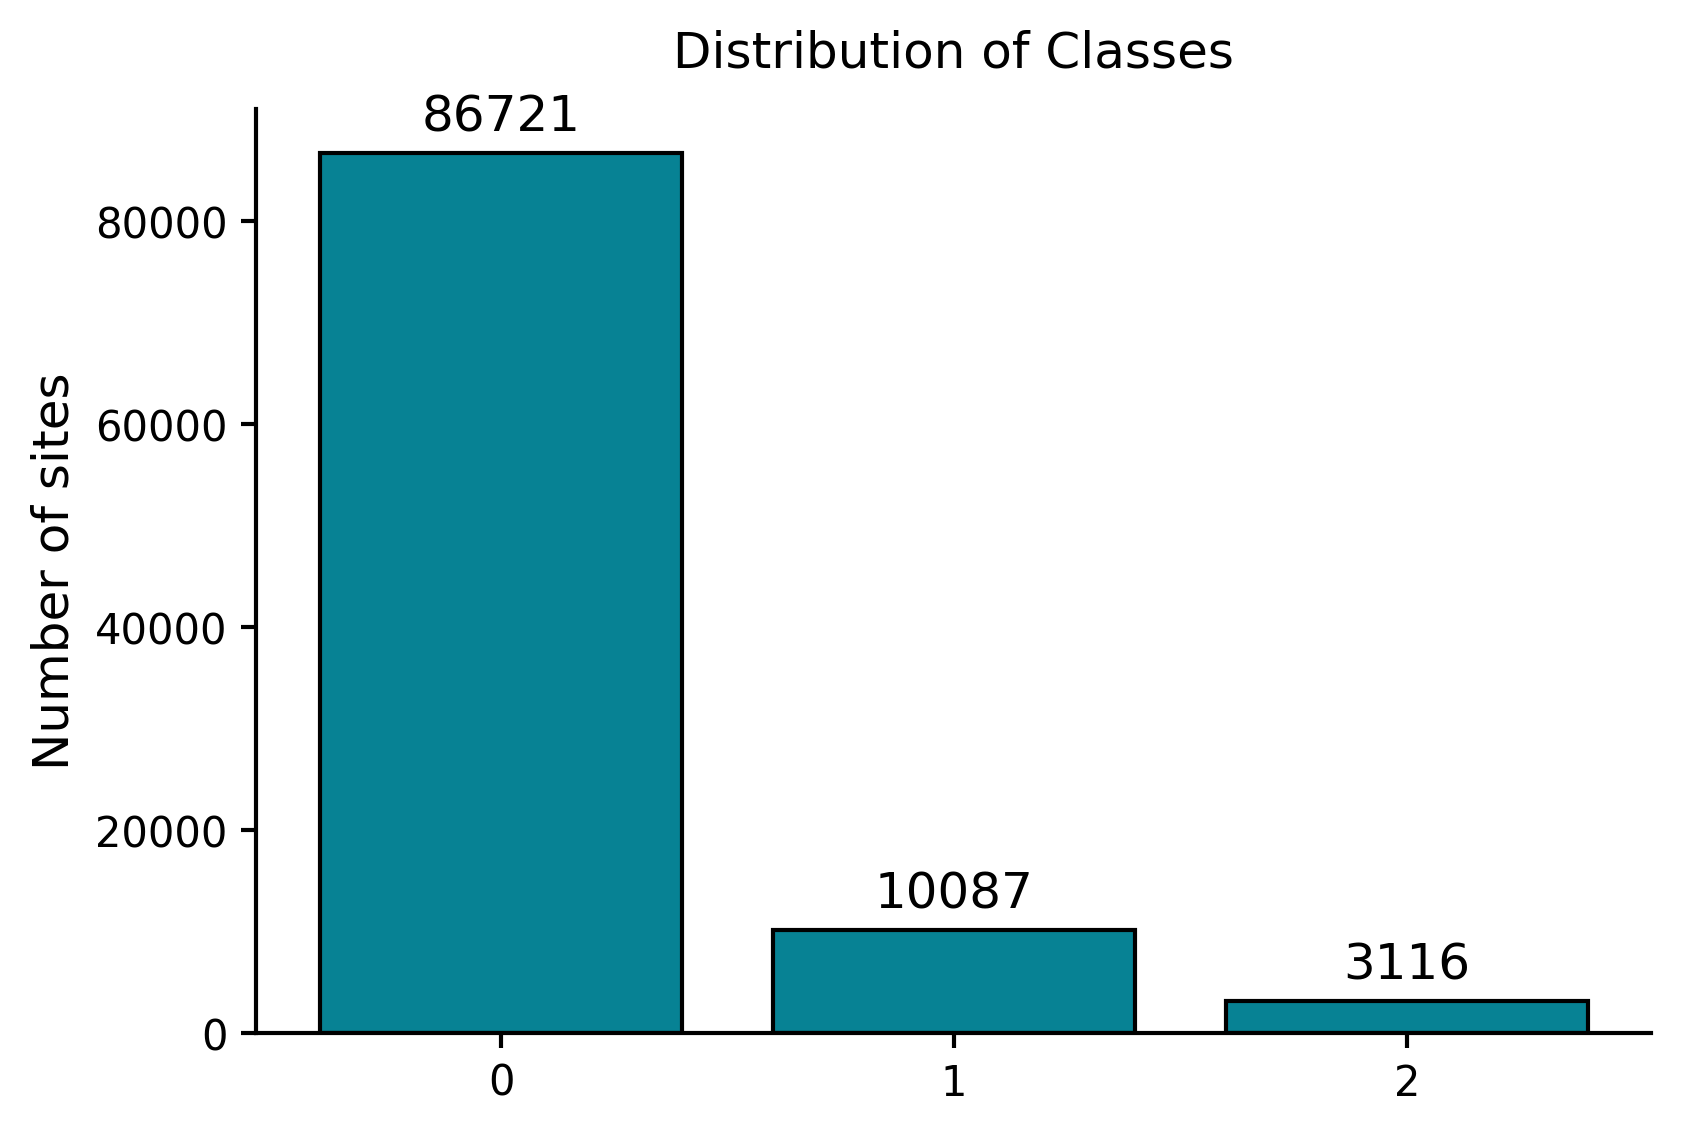

In [14]:
plotter.outcome_descriptive("pdgrouprevaluation", "Distribution of Classes")